# Lecture 24
- Matrix Operations
- System of Linear Equations
- Gauss-Jordan Elimination

In [3]:
import numpy as np
import numpy.linalg as la
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline
plt.style.use('bmh')

def plotvec(*argv):
    colors=['k','b','r','g','c','m']
    xmin=0
    xmax=-1000000
    ymin=0
    ymax=-1000000
    origin=[0,0]
    plt.figure()
    for e in enumerate(argv):
        i=e[0]
        arg=e[1]
        plt.quiver(*origin,*arg,angles='xy',scale_units='xy',scale=1,
                   color=colors[i%len(colors)])
        xmin=min(xmin,arg[0])
        xmax=max(xmax,arg[0])
        ymin=min(ymin,arg[1])
        ymax=max(ymax,arg[1])
    plt.xlim(min(-1, xmin-1), max(1,xmax+1))
    plt.ylim(min(-1,ymin-1),max(1,ymax+1))

# Last Class

- K-means Clustering

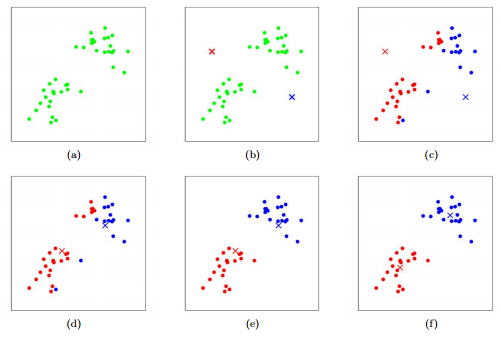

In [4]:
from IPython.display import Image
Image('figures/kmeansViz.png', width=500)

# Recap from Lectures 21 and 22

<div class="alert alert-info">
    <b>Linearly Dependent</b>

We say that a collection of vectors $\mathbf{a}_0, \mathbf{a}_1, \ldots, \mathbf{a}_{k-1}$ is **linearly dependent** if 
there exist nonzero constants $\beta_0, \beta_1, \ldots, \beta_{k-1}$ such that

$$ \beta_0 \mathbf{a}_0 + \beta_1 \mathbf{a}_1 + \cdots \beta_{k-1} \mathbf{a}_{k-1} =\mathbf{0}$$

</div>

<div class="alert alert-info">
    <b>Linearly Independent</b>

We say that a collection of vectors $\mathbf{a}_0, \mathbf{a}_1, \ldots, \mathbf{a}_{k-1}$ is **linearly independent** if they are not linearly dependent. In other words, the equation 

$$ \beta_0 \mathbf{a}_0 + \beta_1 \mathbf{a}_1 + \cdots \beta_{k-1} \mathbf{a}_{k-1} =0 $$

only holds if $\beta_0 =\beta_1= \cdots= \beta_{k-1}=0$.
</div>

<div class="alert alert-info">
    <b>Dimensionality</b>

The *dimensionality* of a set of vectors is the **cardinality** of the **largest linearly independent set** of those vectors

* This means that for a set of vectors of cardinality $k$, the dimension is $\le k$

</div>

<div class="alert-success">

**Orthogonal vectors are linearly independent!**
    
* Because they cannot be written as a linear combination of the other.
</div>

**BUT**

<div class="alert-danger">
    
**Linearly independent vectors are not always orthogonal**
</div>

<div class="alert-info">

**Gram-Schmidt gives us a way to determine the dimensionality of a set of vectors and to determine an orthonormal basis for those vectors**
</div>

<div class="alert-success">
    
**The dimensionality of a set of vectors is the cardinality of the basis found  by Gram-Schmidt**    
</div>

<div class="alert alert-info">
    <b>Rotation Matrix</b>

The vectors for 2-D axes rotated **counterclockwise** by $\theta$ degrees are $\mathbf{x}'=[\cos \theta, \sin\theta]^T$ and $\mathbf{y}'=[\cos (\theta + 90^\circ), \sin(\theta+90^\circ)]^T$. Applying standard trignometry identities, we have $\mathbf{y}'=[-\sin (\theta ), \cos(\theta)]^T$. Thus, the vertically stacked vectors form the following rotation array:

\begin{align*}
R = \left[\mathbf{x} | \mathbf{y}\right] = \left[\begin{array}{cc} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{array}\right]
\end{align*}

</div>

Let's load the **Iris Dataset**.

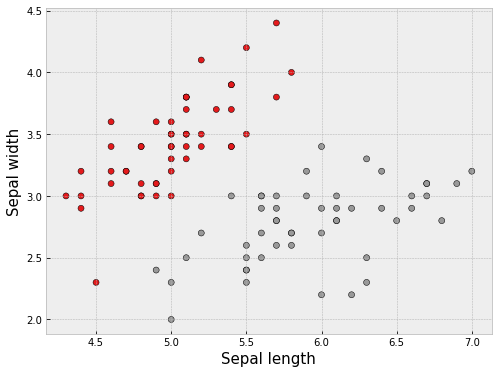

In [5]:
from sklearn import datasets
iris=datasets.load_iris() # loading the iris dataset

#Let's just look at the first 2 classes and the first 2 features:
class01 = np.where(iris.target!=2)[0]

X = iris.data[class01,:2].T # data matrix of size 2-by-100
y = iris.target[class01] # vector of labels of size 100-by-1

plt.figure(figsize=(8, 6))
plt.scatter(X[0,:], X[1,:], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length',size=15); plt.ylabel('Sepal width', size=15);

In [6]:
def makerot(theta):
    '''This function creates a 2x2 rotation 
    matrix for a given angle (theta) in degrees'''
    
    theta=np.radians(theta)
    
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    
    return R

In [8]:
R = makerot(60)  # Compare with lecture 22
R

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])

We know how to perform the dot product of these axes vectors with a single vector:

In [9]:
X.shape # 2 features and 100 points

(2, 100)

In [10]:
X[:,0]

array([5.1, 3.5])

In [11]:
r1 = R@X[:,0] # rotating this sample by 60 degrees
r1

array([-0.48108891,  6.16672956])

We can rotate all the vectors in the iris data set by taking the inner product of the basis vectors (in columns of an array) with data in columns of an array:

In [12]:
rotated = R@X

X.shape, rotated.shape

((2, 100), (2, 100))

Using this, plot the rotated data, and find a rotation that makes the two clusters separable using only the x-axis value:

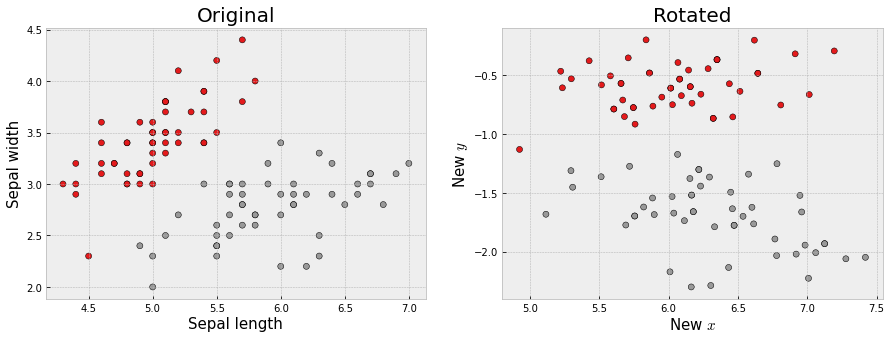

In [21]:
axes = makerot(-40)
# Find a good value that allows data to be 
# separated using only x-axis info

rotated=axes@X

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(X[0,:], X[1,:], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length',size=15); plt.ylabel('Sepal width', size=15)
plt.title('Original',size=20)

plt.subplot(122)
plt.scatter(rotated[0, :], rotated[1,:], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('New $x$',size=15); plt.ylabel('New $y$', size=15)
plt.title('Rotated',size=20);



With our perspective of arrays as horizontally stacked vectors, we can do inner products with any numbers of vectors and get out the corresponding inner products.

For example:

In [22]:
G = np.array([[3,7], # two 3-vectors
            [1,1],
            [0,-2]])

G

array([[ 3,  7],
       [ 1,  1],
       [ 0, -2]])

In [23]:
G.shape

(3, 2)

In [25]:
H = np.array([[2,2,2,2], # four 3-vectors
            [-1,2,-1,2],
            [5,3,2,4]])
H

array([[ 2,  2,  2,  2],
       [-1,  2, -1,  2],
       [ 5,  3,  2,  4]])

In [26]:
H.shape

(3, 4)

In [27]:
G.T@H

array([[ 5,  8,  5,  8],
       [ 3, 10,  9,  8]])

The $i$th row represents all the inner product associated with the $i$th vector in G:

In [29]:
G[:,0]@H

array([5, 8, 5, 8])

The $j$th column represents all the inner products associated with the $j$th vector in H:

In [30]:
G.T@H[:,0]

array([5, 3])

Thus the $(i,j)$-th entry in the output matrix is the dot product from the $i$th left vector and the $j$th right vector.

# Matrix Multiplication

This is **matrix multiplication**.

However, usually matrix multiplication is not carried out in exactly this way. 

The usual form for matrix multiplication is to take the dot products of the **rows** of the left-hand matrix with the **columns** of the right-hand matrix.

The ```@```symbol in Python is doing the usual matrix multiplication, which is why we need to transpose ($^T$) the left-hand matrix to conduct inner products on the columns.

For standard matrix multiplication the $(i,j)th$ entry is the dot product of the $i$th **row** of the left-hand matrix with the $j$th **column** of the right-hand matrix.

Let's do an example by hand. I will use the following matrices:
$$ A= \begin{bmatrix} 1& 3\\ 2 & -2 \\ \end{bmatrix} ~~~~~~~ B= \begin{bmatrix} 2 & -1 & 1\\ 3 & 1 & -3\\ \end{bmatrix}$$

* *on electronic whiteboard*

In [31]:
A=np.array([[1,3], [2, -2]])

B=np.array([[2,-1,1], [3,1,-3]])

In [34]:
A.shape, B.shape

((2, 2), (2, 3))

In [32]:
A@B

array([[11,  2, -8],
       [-2, -4,  8]])

In [33]:
(A@B).shape

(2, 3)

If the left array has shape $(r_L, c_L)$ and the right array has shape $(r_R, c_R)$, then two things are true:
1. We must have $c_L = r_R$. **The inner dimensions must be the same!**
2. The dimensions of the output array will be $(r_R, c_L)$. **The shape of the output array is determined by the outer dimensions.**

Let's look at identity matrices in matrix multiplication.

In [36]:
I2 = np.eye(2)

I2

array([[1., 0.],
       [0., 1.]])

In [38]:
print(A)

print(I2@A)

[[ 1  3]
 [ 2 -2]]
[[ 1.  3.]
 [ 2. -2.]]


In [39]:
print(B)

print(I2@B)

[[ 2 -1  1]
 [ 3  1 -3]]
[[ 2. -1.  1.]
 [ 3.  1. -3.]]


In [40]:
print(B)

print(B@I2)

[[ 2 -1  1]
 [ 3  1 -3]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [41]:
I3 = np.eye(3)

print(B@I3)

[[ 2. -1.  1.]
 [ 3.  1. -3.]]


# Matrices vs Arrays

<div class="alert alert-info">
    <b>Matrix</b>
 
A **matrix** is a rectangular array of numbers; that is, it is a 2-dimensional ordered set of values, with equal numbers of elements in each row and equal number of elements in each column.

An **array** is the extension of a matrix that can have more than 2 dimensions.
</div>

* In this class, I will generally use the terms interchangeably
* In ```numpy```, there is a ```np.array()``` class and a ```np.matrix()``` class.
* The ```np.matrix()``` class has **very few advantages** over the ```np.array()``` class. Therefore, we will just use ```np.array()```.

    * Numpy matrices are strictly 2-dimensional, while numpy arrays (ndarrays) are N-dimensional. Matrix objects are a subclass of ndarray, so they inherit all the attributes and methods of ndarrays.
    
    * The main advantage of numpy matrices is that they provide a convenient notation for matrix multiplication: if ```a``` and ```b``` are matrices, then ```a*b``` is their matrix product.

In [45]:
np.matrix([[1,2],[3,4]])*np.matrix([[1],[1]]) # matrix multiplication

matrix([[3],
        [7]])

In [43]:
np.array([[1,2],[3,4]])*np.array([[1],[1]]) # not matrix multiplication!!

array([[1, 2],
       [3, 4]])

In [44]:
np.array([[1,2],[3,4]])@np.array([[1],[1]]) # matrix multiplication!

array([[3],
       [7]])

## Special Types of Matrices

We have already been introduced to one type of special matrix: the **identity matrix**

In [46]:
I5 = np.eye(5)

I5

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Two other simple types are the **all-zeros matrix**, denoted by $\mathbf{0}$ or $\mathbf{0}_n$, and the **all-ones matrix**, denoted by $\mathbf{1}$ or $\mathbf{1}_n$:

In [50]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [48]:
np.ones((5,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

**Unlike the identity matrix, zeros and ones matrices are not necessarily square.**

<div class="alert alert-info">
    <b>Diagonal Matrix</b>
 
A **diagonal matrix** $\mathbf{M}$ has non-zero entries only in the diagonal elements $\mathbf{M}_{ii}$ and zeros everywhere else.
</div>

```numpy``` provides methods to go from a list or vector of elements on the diagonal to a diagonal matrix:

In [52]:
D = np.diag([3,4,5])

D

array([[3, 0, 0],
       [0, 4, 0],
       [0, 0, 5]])

In [54]:
I3 = np.diag([1,1,1])

I3

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

Given a diagonal matrix, the same function will return a vector of the elements on the diagonal:

In [57]:
np.diag(D)

array([3, 4, 5])

The identity matrix is a diagonal matrix with all 1s on the diagonal:

In [ ]:
I3 = np.diag([1,1,1])

I3

<div class="alert alert-info">
    <b>Upper-diagonal Matrix</b>
    
An **upper-diagonal matrix** $\mathbf{U}$ has $U_{ij}=0$ for all $i>j$.

</div>

Example:

In [58]:
U=np.array([
    [1,3,7],
    [0,4,2],
    [0,0,5]])
U

array([[1, 3, 7],
       [0, 4, 2],
       [0, 0, 5]])

<!-- <div class="alert alert-info"> -->
<!--     <b>Lower-diagonal Matrix</b> -->

**Lower-diagonal Matrix**

An **lower-diagonal matrix** $\mathbf{L}$ has $L_{ij}=0$ for all $i<j$.

<!-- </div> -->

Example:

In [ ]:
L=np.array([
    [1,0,0],
    [2,4,0],
    [5,3,7]])
L

## Matrix Transpose

<div class="alert alert-info">
    <b>Matrix Transpose</b>

The **transpose of a matrix** $\mathbf{M}$ is denoted by $\mathbf{M}^T$ and satisfies $(\mathbf{M}^T)_{ij} = \mathbf{M}_{ji}$.

* The rows of $\mathbf{M}$ become the columns of $\mathbf{M}^T$, and vice versa.
</div>

In [59]:
npr.seed(12)

M=npr.randint(4, size=(3,3))

print(M,'\n\n', M.T)

[[3 3 2]
 [1 1 2]
 [3 3 0]] 

 [[3 1 3]
 [3 1 3]
 [2 2 0]]


**Transpose does not require a square matrix:**

In [60]:
M=np.array([
    [1,2,3,4],
    [5,6,7,8]])

M.T

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

## Matrix Addition and Subtraction

**Matrices of the same sizes can be added or subtracted.** Addition/subtraction is performed elementwise; i.e. 

\begin{align*}
(\mathbf{A}+\mathbf{B})_{ij}= \mathbf{A}_{ij} + \mathbf{B}_{ij}
\end{align*}

and

\begin{align*}
(\mathbf{A}-\mathbf{B})_{ij}= \mathbf{A}_{ij} -\mathbf{B}_{ij}
\end{align*}

In [61]:
npr.seed(10)

A=npr.randint(4,size=(3,2))
B=npr.randint(4,size=(3,2))

In [62]:
print('A=',A,'\n\n B=', B, '\n\n A+B=', A+B)

A= [[1 1]
 [0 3]
 [0 1]] 

 B= [[3 0]
 [1 1]
 [0 1]] 

 A+B= [[4 1]
 [1 4]
 [0 2]]


In [63]:
print('A=',A,'\n\n B=', B, '\n\n A-B = ',A-B)

A= [[1 1]
 [0 3]
 [0 1]] 

 B= [[3 0]
 [1 1]
 [0 1]] 

 A-B =  [[-2  1]
 [-1  2]
 [ 0  0]]


Because matrix addition and subtraction are elementwise, matrix addition inherits the following properties from scalar addition:

* **Commutativity** $\mathbf{A} + \mathbf{B} = \mathbf{B} + \mathbf{A}$
* **Associativity** $( \mathbf{A} + \mathbf{B}) + \mathbf{C} =  \mathbf{A} + (\mathbf{B} + \mathbf{C})$
* **Additive Identity** The additive identity is the zero matrix. That means $\mathbf{A} + \mathbf{0} = \mathbf{0}+ \mathbf{A}= \mathbf{A}$
* **Transpose distributes over addition** $(\mathbf{A} + \mathbf{B})^T = \mathbf{A}^T + \mathbf{B}^T$

## Scalar-Matrix Multiplication

Multiplication of a matrix by a scalar results in multiplication of each element with that scalar:

\begin{align*}
\alpha \begin{bmatrix} m_{00} & m_{01} & \ldots & m_{0j}\\ m_{10} & m_{11} & \ldots & m_{1j}\\ \vdots & \vdots & \vdots & \vdots \\ m_{k0} & m_{k1} & \ldots & m_{kj}\\ \end{bmatrix} = \begin{bmatrix} \alpha m_{00} & \alpha m_{01} & \ldots & \alpha m_{0j}\\ \alpha m_{10} & \alpha m_{11} & \ldots & \alpha m_{1j}\\ \vdots & \vdots & \vdots & \vdots \\ \alpha m_{k0} & \alpha m_{k1} & \ldots & \alpha m_{kj}\\ \end{bmatrix}
\end{align*}

Scalar-matrix multiplication satisfies several properties:

\begin{align*}
(\beta + \gamma) \mathbf{A} = \beta \mathbf{A} + \gamma \mathbf{A}
\end{align*}

and

\begin{align*}
(\beta \gamma) \mathbf{A} = \beta (\gamma \mathbf{A})
\end{align*}

As with usual multiplication and addition, scalar-matrix multiplication takes priority over matrix addition, so 

\begin{align*}
\beta \mathbf{A} + \gamma \mathbf{A} =  (\beta \mathbf{A}) + (\gamma \mathbf{A})
\end{align*}

## Matrix Norm

<div class="alert alert-info">
    <b>Matrix Norm</b>
    
The norm of an $m \times n$ matrix $\mathbf{A}$ is 
\begin{align*}    
\left\| \mathbf{A} \right\| = \sqrt{\sum_{i=0}^{m-1}\sum_{j=0}^{n-1} A_{ij}^{2}}
\end{align*}
</div>

Matrix norm satisifies several properties:
* **Triangle Inequality** $\left\| \mathbf{A} + \mathbf{B} \right\| \le \left\| \mathbf{A} \right\| + \left\| \mathbf{B} \right\| $
* **Norm of Transposed Matrix** $\left\| \mathbf{A}^T \right\| = \left\| \mathbf{A} \right\|$
* **Relation to Vector Norms** If $\mathbf{a}_0, \mathbf{a}_1, \ldots, \mathbf{a}_{n-1}$ are the columns of a matrix $\mathbf{A}$, then $\left\| \mathbf{A} \right\|^2 = \left\| \mathbf{a}_0 \right\|^2 + \left\| \mathbf{a}_1 \right\| ^2+ \ldots + \left\| \mathbf{a}_{n-1}  \right\|^2$

We can use the matrix norm to define distance between two matrices $\mathbf{A}$ and $\mathbf{B}$ as $\left\| \mathbf{A} - \mathbf{B} \right\|$. Small distances imply the two matrices are similar

___
## Reading

Be sure to **study**  Chapter 6 in the Boyd and Vanderberghe *Introduction to Applied Linear Algebra* book.

___

# Matrices and Linear Equations

We can use matrices and vectors to concisely express systems of linear equations **and to efficiently solve them**.

We begin by defining **vector-vector functions**.

The notation 

\begin{align*}
\mathbf{f}: \mathbb{R}^n \rightarrow \mathbb{R}^m
\end{align*}

means that $\mathbf{f}$ is a function that takes a $n$-vector as input and produces an $m$-vector as output.

(I will use bold letters for the function $f$ to indicate that it is a vector function).

One special case is the matrix-vector multiplication function:

\begin{align*}
\mathbf{f}(\mathbf{x}) = \mathbf{Ax},
\end{align*}

where $\mathbf{A}$ is a $m \times n$ matrix.

<div class="alert alert-info">
    
As usual, the vector-vector function $\mathbf{f}(\mathbf{x})$ is **linear** if it satisfies the **superposition property**:

\begin{align*}
\mathbf{f} \left( \alpha \mathbf{x} + \beta \mathbf{y} \right) = \alpha \mathbf{f} \left(  \mathbf{x}\right) 
+ \beta\mathbf{f} \left( \mathbf{y} \right)
\end{align*}
</div>

The matrix-vector multiplication function $\mathbf{f}(\mathbf{x}) = \mathbf{Ax}$ is linear:
\begin{align*}
\mathbf{f} \left( \alpha \mathbf{x} + \beta \mathbf{y} \right) &=\mathbf{A} \left( \alpha \mathbf{x} + \beta \mathbf{y} \right)\\
&= \mathbf{A} \left( \alpha \mathbf{x}\right) + \mathbf{A} \left( \beta \mathbf{y} \right) \\
&= \alpha \left( \mathbf{A} \mathbf{x}\right) + \beta \left( \mathbf{A} \mathbf{y} \right) \\
&= \alpha \mathbf{f} \left(  \mathbf{x}\right) + \beta \mathbf{f} \left( \mathbf{y} \right) 
\end{align*}

<div class="alert alert-info">
In fact, if $\mathbf{f}: \mathbb{R}^n \rightarrow \mathbb{R}^m$ is linear, then $\mathbf{f}$ can be written as $\mathbf{f}(\mathbf{x}) = \mathbf{Ax}$, where $\mathbf{A}$ is unique. 
</div>

**<font color=blue>Examples of linear functions</font>** (More examples in Boyd book)

1. **Negation**

\begin{align*}
\mathbf{f}(\mathbf{x} ) = - \mathbf{x},
\end{align*}

which can be written as

\begin{align*}
\mathbf{f}(\mathbf{x} ) = (-\mathbf{I}) \mathbf{x}
\end{align*}


2. **Reversal**
\begin{align*}
\mathbf{f}(\mathbf{x} ) = \left[ x_{n-1}, x_{n-2}, \ldots, x_1, x_0 \right]
\end{align*}

Let 

\begin{align*}
\mathbf{A} =  \begin{bmatrix} 0 & \ldots & 0 & 1 \\ 0 & \ldots & 1 & 0 \\ \vdots & \ddots & \vdots & \vdots \\
1 & \ldots & 0 & 0 \\\end{bmatrix}
\end{align*}

Then $\mathbf{f}(\mathbf{x}) = \mathbf{Ax}$.

**<font color=blue>Examples of nonlinear functions</font>** 

3. **Quadratic function**: each $x_i \rightarrow x_{i}^2$

Consider

\begin{align*}
\mathbf{f}(\mathbf{x}+\mathbf{y})&= \left[ (x_0+y_0)^2,(x_1+y_1)^2,\ldots \right] \\
&=\left[ x_{0}^{2} +2x_0 y_0+y_{0}^{2},x_{1}^{2} +2x_1 y_1+y_{1}^{2},\ldots\right]\\
&\ne \mathbf{f}(\mathbf{x})+ \mathbf{f}(\mathbf{y}) \\
&= \left[ x_{0}^{2} +y_{0}^{2},x_{1}^{2} +y_{1}^{2},\ldots\right]\\
\end{align*}


4. **Absolute Value**:  each $x_i \rightarrow |x_i|$

Consider $n=1$

\begin{align*}
f((-1)(1)+(0)(1))&= |-1| \\
&= 1 \\
&\ne (-1) f(1) + (0) f(1) \\
&= (-1) |1| + (0) |1| \\
&=-1
\end{align*}

5. **Sort**: consider the function $\mathbf{f}(\mathbf{x})$ that sorts $\mathbf{x}$ in decreasing order:

\begin{align*}
\mathbf{f}( [1,0]^T + [ 0,1]^T) &=\mathbf{f}( [1,1]^T) \\
&=[1,1]^T \\
& \ne \mathbf{f}([1,0]^T) + \mathbf{f}([ 0,1]^T) \\
&= [1,0]^T + [1,0]^T \\
&=[2,0]^T
\end{align*}

## Affine Functions

<div class="alert alert-info">
    <b>Affine Function</b>
            
A vector-function is **affine** if $\mathbf{f}(\mathbf{x}) = \mathbf{Ax} + \mathbf{b}$, where $\mathbf{A}$ is a $m \times n$ matrix and $b$ is an $m$-vector.
    
We define this linear matrix-vector multiplication function as 

\begin{align*}
\mathbf{f}: \mathbb{R}^n &\longrightarrow \mathbb{R}^m \\
\mathbf{x} &\longmapsto \mathbf{A}\mathbf{x} +\mathbf{b}
\end{align*}
</div>

Affine functions are often casually referred to as linear, but they are not linear unless $\mathbf{b} = \mathbf{0}$ because superposition does not hold in general.

It can be shown that for affine functions, superposition holds in the special case that $\alpha+\beta=1$:
\begin{align*}
\mathbf{f}(\alpha \mathbf{x} + \beta \mathbf{y}) &=
\mathbf{A}(\alpha \mathbf{x} + \beta \mathbf{y}) +\mathbf{b} \\
&=\alpha \mathbf{A} \mathbf{x} + \beta \mathbf{A} \mathbf{y} +\mathbf{b} \\
&=\alpha \mathbf{f} (\mathbf{x}) + \beta \mathbf{f}(y) \\
&= \alpha  \left(\mathbf{A}\mathbf{x} +\mathbf{b} \right) + \beta \left(\mathbf{A} \mathbf{y} +\mathbf{b} \right) \\
&= \alpha \mathbf{A} \mathbf{x} + \beta \mathbf{A} \mathbf{y} +(\alpha+\beta) \mathbf{b} \\
&= \alpha \mathbf{A} \mathbf{x} + \beta \mathbf{A} \mathbf{y} + \mathbf{b}
\end{align*}

# Systems of Linear Equations

Define a linear matrix-vector multiplication function as 

\begin{align*}
\mathbf{f}: \mathbb{R}^n &\longrightarrow \mathbb{R}^m \\
\mathbf{x} &\longmapsto \mathbf{A}\mathbf{x}
\end{align*}

That is $\mathbf{f}(\mathbf{x}) = \mathbf{A}\mathbf{x}$ where $\mathbf{A}$ is a $m \times n$ matrix.

One of the most important applications of linear vector functions is to solve linear systems of equations.

Consider a system of $m$ equations in $n$ variables $x_0, x_1, \ldots, x_{n-1}$:
\begin{align*}
A_{00}x_0 +A_{01}x_1 +···+A_{0,n-1}x_{n-1} &=b_0 \\
A_{10}x_0 +A_{11}x_1 +···+A_{0,n-1}x_{n-1} &=b_1 \\
\vdots\\
A_{m-1,0}x_0 +A_{m-1,1}x_1 +···+A_{m-1,n-1}x_{n-1} &=b_{m-1}, \\
\end{align*}
where
* $A_{ij}$ are numbers and are called *coefficients*, and 
* $b_j$ are numbers called *right-hand sides*

Then the system of linear equations can be written concisely in matrix notation as

\begin{align*}
\mathbf{Ax} = \mathbf{b},
\end{align*}

where $\mathbf{x}= [x_0, x_1, x_{n-1}]^T$ is the vector of variables (unknowns).

An $n$-vector of values $\mathbf{x}$ is a solution to the system of linear equations if $\mathbf{Ax}=\mathbf{b}$ holds.

A system of linear equations may have:
* no solutions
* a unique solution
* many solutions

* The set of linear equations is called **over-determined** if $m > n$. In this case, the coefficient matrix $\mathbf{A}$ is *tall*, that is, we have more equations than variables or unknowns.

* The set of linear equations is called **under-determined** if $m < n$. In this case, the coefficient matrix $\mathbf{A}$ is *wide*, that is, there are more unknowns than equations.

* The set of linear equations is called **square** if $m=n$. In this case, the coefficient matrix $\mathbf{A}$ is *square*, that is, the numbers of unknowns and equations is the same.

A set of equations with zero right-hand side, $\mathbf{A}{\mathbf{x}} = \mathbf{0}$, is called a **homogeneous** set of equations. **Any homogeneous set of equations has $\mathbf{x}=\mathbf{0}$ as a solution.**

Consider the set of equations

\begin{align*}
\begin{cases} 3x_1 &= 30\\ x_1+2x_2&=18\\ x_2 - x_3 &= 2 \end{cases} \iff 
\begin{cases} 3x_1 + 0x_2 + 0x_3 &= 30\\ 1x_1 + 2x_2 + 0x_3 &= 18\\ 0x_1 + 1x_2 - 1x_3 &= 2 \end{cases}
\end{align*}

In matrix form, we would write

\begin{align*}
\begin{bmatrix} 3 & 0 & 0 \\ 1 & 2 & 0\\ 0 & 1 & -1\\ \end{bmatrix} \begin{bmatrix} x_1\\ x_2\\ x_3 \end{bmatrix} =  \begin{bmatrix} 30\\ 18\\ 2\\ \end{bmatrix}
\end{align*}

## Augmented Matrix

Each system of linear equations can be represented by an **augmented matrix**. From the example above, we have the following augmented matrix:

\begin{align*}
\left[\begin{array}{ccc|c} 3 & 0 & 0 & 30\\ 1 & 2 & 0 & 18 \\ 0 & 1 & -1 & 2 \end{array}\right]
\end{align*}

### Operations on Augmented Matrices

There are three elementary row operations we can do on augmented matrices:

<div class="alert alert-info">
    <b>Augmented Matrices Operations</b>
    
1. **Swap**: exchange any two rows of the augmented matrix (example: swap row 2 with row 3, $R2 \leftarrow R3$)

2. **Scale**: multiply any row by a non-zero constant (example: scale row 1 by $\frac{1}{3}$, $R1 \leftarrow \frac{1}{3}R1$)

3. **Pivot**: add a multiple of a row to another row (example: $R1 \leftarrow R1 -3R2$)
</div>

## Row Echelon Form

A matrix is said to be in **row echelon form** if:

1. Each leading entry is equal to 1
2. Each leading entry lies to the right of the leading entry above it (upper-diagonal matrices for square matrices)
3. Rows containing zeros are at the bottom of the matrix

For example,

\begin{align*}
\left[\begin{array}{ccc}1 & -4 & 0 \\ 0 & 1 & 5 \\ 0 & 0 & 1\end{array}\right]
\end{align*}

is a matrix in **row echelon form**.

The linear transformation $\mathbf{A}$ for our affine function does not have to be a square matrix. The following examples represent matrices is row echelon form:

over-determined
\begin{align*}
\left[\begin{array}{cccc}1 & -4 & 0 & 2\\ 0 & 1 & 5 & 7 \\ 0 & 0 & 0 & 1\end{array}\right]
\end{align*}

under-determined
\begin{align*}
\left[\begin{array}{cc}1 & -4 \\ 0& 1 \\ 0 & 0 \\ 0& 0\end{array}\right]
\end{align*}

We will use the **gaussian elimination** algorithm to reduce the augmented matrix into a row echelon form matrix.

Once a matrix is in row echelon form, in order to solve the system of linear equations, we can:

1. Use back substitution
2. Gauss-Jordan elimination

# Gauss-Jordan Elimination

In the Gauss-Jordan Elimination algorithm, the augmented matrix is put in **reduced row echelon form (rref)**.

A matrix is said to be in reduced row echelon form if leading row elements equal to 1 and the elements above and below it are equal to 0. For example:

\begin{align*}
\left[\begin{array}{ccc|c} 1 & 0 & 0 & 10\\ 0 & 1 & 0 & 2 \\ 0 & 0 & 1 & 2 \end{array}\right]
\end{align*}

\begin{align*}
\left[\begin{array}{cc|c} 1 & 0 & 10\\ 0 & 1 & 2 \\ 0 & 0 & 2 \end{array}\right]
\end{align*}

\begin{align*}
\left[\begin{array}{cccc|c} 1 & 0 & 0 & 0 & 10\\ 0 & 1 & 0 & 0 & 2\\ 0 & 0 & 0 & 1 & 2\end{array}\right]
\end{align*}

\begin{align*}
\left[\begin{array}{ccc|c} 1 & 0 & -\frac{1}{2} & -1\\ 0 & 1 & -\frac{1}{4} & \frac{3}{2} \\ 0 & 0 & 0 & 0\end{array}\right]
\end{align*}

Transforming a row echelon form to a reduced row echelon form can be accomplished with only *pivot* operations.

Observations:

* Row echelon form is typically not unique
* Reduced echelon form is unique
* Both echelon and reduced echelon forms describe the original system

### Geometric Interpretation

Example:

\begin{align*}
\begin{cases} x+y=6\\ x-y=-2 \end{cases}
\end{align*}

\begin{align*}
\begin{cases} x-y=-2\\ x-y=-6 \end{cases}
\end{align*}

A system of equations has a *unique* solution if all the lines (or hyperplanes, for higher-dimensions) intersect at a common point.

A system of equations has an *infinite* number of solutions if the lines are: (1) parallel or (2) identical.

## Consistent vs Dependent Systems

A system of linear equations can have one solution, an infinite number of solutions, or no solution. Systems of equations can be classified by the number of solutions.

* If a system has *at least one solution*, it is said to be **consistent**.

* If a consistent system has *exactly one solution*, it is **independent**.

* If a consistent system has an *infinite number of solutions*, it is **dependent**. When you graph the equations, both equations represent the same line.

* If a system has *no solution*, it is said to be **inconsistent**. The graphs of the lines do not intersect, so the graphs are parallel and there is no solution.

A system is said to be **independent** if the correspondent augmented matrix has a *unique* solution. This means that the matrix $\mathbf{A}$ in our affine equation, $\mathbf{\mathbf{y}} = \mathbf{A}\mathbf{x}$ has **independent columns** (or rows) which correspond to independent or **informative features**.

* Example: basis vectors

A system is said to be **dependent** if the correspondent augmented matrix has *infinite* solutions. This means that the matrix $\mathbf{A}$ in our affine equation, $\mathbf{\mathbf{y}} = \mathbf{A}\mathbf{x}$ has **dependent columns** (or rows). One or more columns are a **linear combination** of other columns. We can think of features to be **correlated**.

* A dependent system is also said to be an **inconsistent system**.

<div class="alert alert-info">

The Gaussian-Jordan elimination algorithm will allow us to determine whether our system is **independent** or **dependent**.
</div>

### Types of Systems

A system can have:

* Infinite number of solutions
    * Example: 
    
    \begin{align*}
    \begin{cases} x-y=-2\\ 2x-2y=-4 \end{cases}
    \end{align*}
    
* Single unique solution
    * Example: 
    \begin{align*}
    \begin{cases} x-y=-2\\ 2x-2y=-4 \\ x+y=6 \end{cases}
    \end{align*}

* No solutions
    * Example: 
    \begin{align*}
    \begin{cases} x-y=-2\\ x-y=0 \end{cases}
    \end{align*}

#### Example

1. Consider the following system of linear equations:

\begin{align*}
\begin{cases} 3x = 30 \\ x + 2y = 18 \\ y - z = 2\end{cases}
\end{align*}

In [ ]:
import numpy as np
import numpy.linalg as la

**Observation:** All columns (and rows) of the reduced row echelon form (rref) matrix are independent (the inner product is 0, which means they are orthogonal). We have a unique solution.

We are interested in finding out whether the linear transformation $\mathbf{A}$ will *preserve* all dimensions $\iff$ linearly independent columns $\iff$ the system has a unique solution.

In fact, we know that intersections between two lines (or hyperplanes) can happen in any of three different ways:
1. the lines intersect at a unique point (i.e., solution exists and is unique),
2. the lines are coincident (that is, the equations represent the same line and there are infinitely many points of intersection; in this case a solution exists, but is not unique), or
3. the lines are parallel but not coincident (so that no solution exists).

Another matrix operation that would allow us to check if matrix $\mathbf{A}$ has linearly independent columns (unique solution) is the **determinant** of $\mathbf{A}$.

Since this quantity *determines* whether or not the system has a unique solution, it is called the
determinant of the coefficient matrix $\mathbf{A}$.

## Determinant of Matrix

The **determinant** of a square $n\times n$ matrix $\mathbf{A}$ is a unique number. It measures the scaling factor by which the linear transformation $\mathbf{A}$ changes any area or volume.

The determinant of $\mathbf{A}$ is denoted by $|\mathbf{A}|$ or $\det(\mathbf{A})$.

Consider the linear transformations $\mathbf{A} = \left[\begin{array}{cc} 3 & 0 \\ 0 & 2\end{array}\right]$ and $\mathbf{A} = \left[\begin{array}{cc} 1 & 1 \\ 0 & 1\end{array}\right]$ 

*see virtual whiteboard*

For a $2\times 2$ matrix 

$$\mathbf{A} = \left[\begin{array}{cc}a & b \\ c & d\end{array}\right]$$

the determinant is given by

$$\det(A) = |\mathbf{A}| = ad - bc$$

For a $3\times 3$ matrix

$$\mathbf{A} = \left[\begin{array}{cc}a & b & c\\ d & e & f \\ g & h & i\end{array}\right]$$

the determinant is given by

$$\det(A) = |\mathbf{A}| = a(ei-fh) + b(fg - di) + c(dh - eg)$$

We can generalize the determinant to any $n \times n$ matrix.

### Some properties of the Determinant:

1. $\det(\mathbf{I}) = 1$

2. $\det(\mathbf{A}^T) = \mathbf{A}$

3. $\det(\mathbf{A}^{-1}) = \frac{1}{\det(\mathbf{A})}$

4. For square matrices $\mathbf{A}$ and $\mathbf{B}$ of equal size, $\det(\mathbf{A}\mathbf{B}) = \det(\mathbf{A})\det(\mathbf{B})$

5. $\det(c\mathbf{A}) = c^n\det(\mathbf{A})$ for an $n\times n$ matrix $\mathbf{A}$ and constant c.

**Observation:** This linear transformation will invert the direction and scale any area by a factor of 6.

**<font color=blue>Example 2</font> Consider the following system of linear equations:**

$$\begin{cases} 4x-4y-z=-10\\ 8x-8y-2z=-20 \\ 4x+12y-5z=14 \end{cases}$$

**Observations:** 

* The linear transformation $\mathbf{A}$ only has 2 linearly independent columns (this can be easily seen from the system of equations). 

* The determinant of this transformation will be 0.

Does this system have a solution?

<!-- Yes, an infinite number of solutions. -->

**<font color=blue>Example 3</font> Consider the following system of linear equations:**

$$\begin{cases} 4x-4y-z=-6\\ 12x+4y-7z=22 \\ 4x+12y-5z=2 \end{cases}$$

Does this system have a solution?

<!-- This system is inconsistent, it does not have a solution.  -->

# Inverse of a Matrix

<div class="alert alert-info">
    
If the square matrix $\mathbf{A}$ has:

* **linearly independent columns**, then the matrix $\mathbf{A}$ is said to be **left-invertible**, that is, there exists a inverse matrix $\mathbf{A}^{-1}$ such that $\mathbf{A}^{-1}\mathbf{A} = \mathbf{I}$.
    
* **linearly independent rows**, then the matrix $\mathbf{A}$ is said to be **right-invertible**, that is, there exists a inverse matrix $\mathbf{A}^{-1}$ such that $\mathbf{A}\mathbf{A}^{-1} = \mathbf{I}$.

</div>

If the linear transformation $\mathbf{A}$ is invertible, then we can compute a solution directly as:

\begin{align*}
\mathbf{A}\mathbf{x} &= \mathbf{b} \\
\mathbf{A}^{-1}\mathbf{A}\mathbf{x} &= \mathbf{A}^{-1}\mathbf{b}\\
\mathbf{I}\mathbf{x} &= \mathbf{A}^{-1}\mathbf{b}\\
\mathbf{x} &= \mathbf{A}^{-1}\mathbf{b}
\end{align*}

For the moment, we will focus on the special case where $\mathbf{A}$ is square ($n \times n$). But we will see that if $\mathbf{A}$ is not square, we need to find a special matrix inverse called *pseudo-inverse*.

In this case, if $\mathbf{A}$ is invertible, then $\mathbf{x}$ is a unique solution to the equation $\mathbf{Ax} = \mathbf{b}$.

**<font color=blue>Example 4</font> Consider the system of linear equations from last class:**

\begin{cases} 3x_1 =30 \\ x_1 + 2x_2 = 18 \\ x_2 - x_3 = 2 \end{cases}

In [ ]:
# Create augmented matrix



So, we can see that $\mathbf{M}$ is a system of linearly independent equations with solutions

\begin{cases} x_1 = 10 \\ x_2 = 4 \\ x_3 = 2 \end{cases}

From above, we know that we could find these same solutions if we knew $\mathbf{A}^{-1}$ as
$$
\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}
$$

Let's see how we can find $\mathbf{A}^{-1}$ by extending the Gauss-Jordan algorithm: *On electronic whiteboard*.

Now let's see how we can use sympy's RREF to find the matrix inverse:

We can find the matrix inverse in numpy using the ```numpy.linalg.inv()``` function:

#### If finding the inverse via Gauss-Jordan reduction already finds the solution to a system of linear equations, what is the advantage of finding the matrix inverse?

* After finding $\mathbf{A}^{-1}$ once, can find the solution to $\mathbf{Ax} = \mathbf{b}_i$ for many different $\mathbf{b}_i$ $\mbox{easily}^{1}$.
* Can find $\mathbf{A}^{-1}$ with other algorithms at lower complexity than Gauss-Jordan.
* Matrix inverse will play an important role in **linear regression**, where we want to find the solution to an over-determined set of equations.

*$\mbox{}^1$ Note that in general, using matrix inverses to solve a system of linear equations is usually discouraged because of problems with numerical accuracy. However, for our purposes, using matrix inverses for this purpose will always be acceptable.*

## Special Case: $2 \times 2$ Matrices

In future classes (especially Emag, you may be required to find a matrix inverse by manual computation). 

In this class, I will only teach you how to find the inverse of a $2 \times 2$ matrix by hand.

(For any classes that require inversion of a $3 \times 3$ matrix, you can find the required manipulations in many places online.)
    
*See electronic whiteboard*

**<font color=blue>Example 5</font>**

In [ ]:
A2=np.array([[2,7], [1,6]])

A2

## Special Case: Diagonal Matrices

Let $\mathbf{D}$ be a diagonal matrix:

\begin{align*}
D &= \operatorname{diag}(d_0,d_1,\dots,d_{n-1}) = \left[\begin{array}{cccc}d_0 & 0 &\dots & 0\\ 0 & d_1 & \dots & 0\\ \vdots & \vdots & \ddots & \vdots\\0 & 0 & \dots & d_{n-1}\end{array}\right]
\end{align*}

Its matrix inverse is:

\begin{align*}
D^{-1} &= \operatorname{diag}\left(\frac{1}{d_0},\frac{1}{d_1},\dots,\frac{1}{d_{n-1}}\right) = \left[\begin{array}{cccc}\frac{1}{d_0} & 0 &\dots & 0\\ 0 & \frac{1}{d_1} & \dots & 0\\ \vdots & \vdots & \ddots & \vdots\\0 & 0 & \dots & \frac{1}{d_{n-1}}\end{array}\right]
\end{align*}

## Special Case: Orthogonal Matrices

Recall that the Gram-Schmidt algorithm found a set of *orthonormal basis vectors*.

**Orthonormal** means both: 
* the vectors are orthogonal $\mathbf{a}_{i}^{T} \mathbf{a}_j=0,~~ i \ne j$
* the vectors are normalized $\forall i, ~ \| \mathbf{a}_i \|^2 =1$

If we have $n$ $n$-vectors, then we can check both of these conditions simultaneously if we hstack the vectors into a matrix 

\begin{align*}
\mathbf{A} = \begin{bmatrix} \mathbf{a}_0 | & \mathbf{a}_1 | & \dots | & \mathbf{a}_{n-1} \end{bmatrix}
\end{align*}

as
\begin{align*}
\mathbf{A}^T \mathbf{A} = \mathbf{I}
\end{align*}

<div class="alert-info">
    <b>Orthogonal Matrix</b>
    
An $n \times n$ matrix $\mathbf{A}$ is an *orthogonal matrix* if it satisfies
\begin{align*}
\mathbf{A}^T \mathbf{A} = \mathbf{I}
\end{align*}

</div>

<div class="alert-info">
    <b>Gram Matrix</b>
    
For a matrix $\mathbf{A}$, the matrix $\mathbf{A}^T \mathbf{A}$ is called the **Gram matrix**.

</div>

Thus, a square matrix is orthogonal if its Gram matrix is the identity matrix.

* Note that the Gram matrix is defined even for matrices that are not square!

* Note that the equation $\mathbf{A}^T \mathbf{A} = \mathbf{I}$ implies that the inverse of an orthogonal matrix $\mathbf{A}$ is its transpose!

___

For general $m \times n$ matrices, they may have left inverses,  right inverses, both, or no inverse matrix.

If a matrix $\mathbf{A}$ has both a left inverse $\mathbf{Y}$ and a right inverse $\mathbf{X}$, then we say the matrix is *invertible* and denote $\mathbf{X}=\mathbf{Y}$ by $\mathbf{A}^{-1}$.

<div class="alert alert-success">

Only square matrices ($n \times n$) can have both (and the same) left and right inverses.
</div>

If a matrix $\mathbf{A}$ is square, then the following are equivalent:
1. $\mathbf{A}$ is invertible
2. The *columns* of $\mathbf{A}$ are linearly independent
3. The *rows* of $\mathbf{A}$ are linearly independent
4. $\mathbf{A}$ has a left inverse
5. $\mathbf{A}$ has a right inverse
6. $|\mathbf{A}|\neq 0$

Since the columns of $\mathbf{A}$ are linearly independent, we know they form a **basis** for $\mathbf{R}^n$!

(as do the rows)

**<font color=blue>Example 6</font> In a previous lecture, we found the following basis for $\mathbb{R}^3$ by using the Gram-Schmidt algorithm on a random matrix:**

In [ ]:
basis=np.array([
    [ 0.08638294,  0.81353398,  0.57506561],
    [ 0.8189811 ,  0.27068952, -0.5059616 ],
    [ 0.56728119, -0.51467431,  0.64288599]
])

### Properties of Matrix Inverse

1. If $\mathbf{A}$ is invertible, then its transpose is also invertible and

\begin{align*}
\left (\mathbf{A}^T \right)^{-1} = \left(\mathbf{A}^{-1} \right)^T
\end{align*}

2. If $\mathbf{A}$ and $\mathbf{B}$ are $n \times n$ invertible matrices, then

\begin{align*}
\left(\mathbf{AB}\right)^{-1} = \mathbf{B}^{-1} \mathbf{A}^{-1}
\end{align*}

Check:
\begin{align*}
\left(\mathbf{AB}\right)^{-1} \left(\mathbf{AB}\right) &=
\mathbf{B}^{-1} \mathbf{A}^{-1}\left(\mathbf{AB}\right)\\
&= \mathbf{B}^{-1} \left( \mathbf{A}^{-1} \mathbf{A} \right)\mathbf{B}\\
&=\mathbf{B}^{-1} \mathbf{I} \mathbf{B}\\
&=\mathbf{B}^{-1} \mathbf{B} \\
&=\mathbf{I}\\
\end{align*}

### Dual Basis

If $\mathbf{A}$ is invertible and $\mathbf{B}=\mathbf{A}^{-1}$, then $\mathbf{B}$ is also an invertible matrix.

Thus, the rows of $\mathbf{B}$ also form a basis of $\mathbb{R}^n$.

The rows of $\mathbf{B}$ are called the **dual basis** for the columns of $\mathbf{A}$, and vice versa.

We can use the **dual basis** to easily find the coefficients to represent a vector $\mathbf{x}$ as a linear coefficient of the columns of $\mathbf{A}$:

Let
\begin{align*}
\mathbf{x} &= \mathbf{ABx} \\
&= \begin{bmatrix} \mathbf{a}_0& \mathbf{a}_1 & \cdots & \mathbf{a}_{n-1} \end{bmatrix} \begin{bmatrix} \mathbf{b}_{0}^{T}\\ \mathbf{b}_{1}^{T}  \\  \vdots\\ \mathbf{b}_{n-1}^{T}\end{bmatrix} \mathbf{x} \\
&= \begin{bmatrix} \mathbf{a}_0& \mathbf{a}_1 & \cdots & \mathbf{a}_{n-1} \end{bmatrix} \begin{bmatrix} \mathbf{b}_{0}^{T} \mathbf{x}\\ \mathbf{b}_{1}^{T} \mathbf{x} \\ \vdots\\ \mathbf{b}_{n-1}^{T}\mathbf{x} \end{bmatrix} \\
&= \mathbf{a}_{0}\left(\mathbf{b}_{0}^{T} \mathbf{x}\right) +\mathbf{a}_{1}\left(\mathbf{b}_{1}^{T} \mathbf{x}\right) + \cdots + \mathbf{a}_{n-1} \left(\mathbf{b}_{n-1}^{T} \mathbf{x}\right)
\end{align*}

**<font color=blue>Example 7 </font> Given a random, invertible $3 \times 3$ matrix $\mathbf{A}$, find the coefficients to represent $\mathbf{x}=[3, 7, 9]^T$ as a linear combination of the columns of $\mathbf{A}$:**

In [ ]:
npr.seed(7)

A = npr.randint(10,size=(3,3))
A

Of course, we can do all those operations in one matrix-vector multiplication:

___

## Application: Polynomial Interpolation

(Read [Boyd's book Section 11.4](http://vmls-book.stanford.edu/vmls.pdf))

Suppose we have a set of data points $(x_i,y_i)$, $i=1,2, \ldots n$.

For a set of $n$ data points, we can always find a polynomial of degree $n-1$ that can fit those data points.

(For example, we can draw a line through any two points in the plane.)

Here we show how to find that polynomial.

Let the polynomial be 

\begin{align*}
p(x) = c_0 x^0 + c_1 x^1 +c_2 x^2 + \ldots + c_{n-1} x^{n-1}
\end{align*}

Then we want to find the values of $c_0, c_1, \ldots, c_{n-1}$ that solve the set of equations:
\begin{align*}
\\p(x_0) &= y_0 \\
p(x_1) &= y_1 \\
&\vdots\\
p(x_{n-1}) &= y_{n-1} \\
\end{align*}

At first glance, this may seem to be a set of **nonlinear** equations. But that is not the case, because the powers of $x_i$ are all **deterministic constants**.

So, we get linear equations in the coefficients $c_i$'s!

Let 

\begin{align*}
\mathbf{A} = \begin{bmatrix} 1 & x_0 & x_{0}^2 & x_{0}^3 & \cdots \\ 1 & x_1 & x_{1}^2 & x_{1}^3 & \cdots \\ \vdots & \vdots & \vdots & \vdots & \cdots\\ 1 & x_{n-1} & x_{n-1}^2 & x_{n-1}^3 & \cdots \end{bmatrix}
\end{align*}

and let

* $\mathbf{c} = \left[ c_0, c_1, \ldots c_{n-1} \right]^T$ be the vector of coefficients
* $\mathbf{y} = \left[ y_0, y_1, \ldots y_{n-1} \right]^T$ be the vector of $y$-values

Then the coefficients satisfy 

\begin{align*}
\mathbf{A}\mathbf{c} = \mathbf{y}
\end{align*}

If $\mathbf{A}$ is invertible, then 

\begin{align*}
\mathbf{c} = \mathbf{A}^{-1} \mathbf{y}
\end{align*}

Let's try an example. Suppose we have the following data observations:

\begin{align*}
(x,y): ~~~ (1,3),~~~ (2, -1), ~~~ (3,2) ~~~ (4,1)
\end{align*}

Is $\mathbf{A}$ invertible?

## Rank of a Matrix

What happens if we try to fit this with fewer coefficents?

Now we only have 2 independent vectors, so they do not form a basis for $\mathbb{R}^4$.

In general, we cannot find a solution, and we cannot use the matrix inverse to find the solution.

This will generally the case for linear transformation $\mathbf{A}$ that are not **full rank**.

<div class="alert-info">
    <b>Matrix Rank</b>
    
The **rank** of a matrix $\mathbf{A}$ is the **dimension of the vector space** generated (or spanned) by its columns. 
    
The rank of a matrix $\mathbf{A}$ corresponds to the maximal number of **linearly independent columns** of $\mathbf{A}$.
</div>

We denote the rank of a matrix $\mathbf{A}$ as:

$$\operatorname{rk}(\mathbf{A}) \text{ or } \operatorname{rank}(\mathbf{A})$$

For a matrix $\mathbf{A}$ of size $n\times m$:

$$\operatorname{rank}(\mathbf{A}) \leq \min(n,m)$$

A matrix is said to have **full rank** if its rank equals the largest possible dimension, that is, $\max(n,m)$.

In [ ]:
A3 = np.array([[1,1,2],[1,2,4],[1,3,6]])
A3